b - Desenvolva um código para fazer a leitura dos arquivos fasta. Utilizar o
biopython. Determine o tamanho de cada uma das sequencias importadas.

In [18]:
import ipywidgets as widgets
from IPython.display import display
from tkinter import Tk, filedialog
from Bio import SeqIO

def ler_fasta():
    # Inicializa o Tkinter para abrir o explorador de arquivos
    root = Tk()
    root.withdraw()  # Esconde a janela principal do Tkinter
    root.call('wm', 'attributes', '.', '-topmost', True)  # Garante que fique no topo
    arquivo = filedialog.askopenfilename(
        title="Selecione um arquivo",
        filetypes=[("Arquivos de Texto", "*.txt")]
    )
    root.destroy()  # Fecha a janela root ao finalizar

    return arquivo

def processar_fasta(sequencias):
        
        for seq_record in sequencias:
            tamanho = len(seq_record.seq)
            print(f"ID da sequência: {seq_record.id}")
            print(f"Tamanho da sequência: {tamanho} nucleotídeos\n")

botao_selecionar = widgets.Button(description="Selecionar arquivo")
fasta = ler_fasta()

seq = list(SeqIO.parse(fasta, "fasta"))
processar_fasta(seq)



ID da sequência: MN908947.3
Tamanho da sequência: 210 nucleotídeos

ID da sequência: MZ264787.1
Tamanho da sequência: 210 nucleotídeos

ID da sequência: NC_019843.3
Tamanho da sequência: 280 nucleotídeos

ID da sequência: MT324062.1
Tamanho da sequência: 280 nucleotídeos

ID da sequência: MT012098.1
Tamanho da sequência: 280 nucleotídeos



c - Faça um gráfico de barra com frequência dos nucleotídeos de cada um dos
registros. Há diferenças nas frequências ? qual poderia ser o motivo desta
diferenças ?. Dica: coloque os nucleotídeos em ordem alfabética para facilitar
a análise.

ID da sequência: MN908947.3
Tamanho da sequência: 210 nucleotídeos



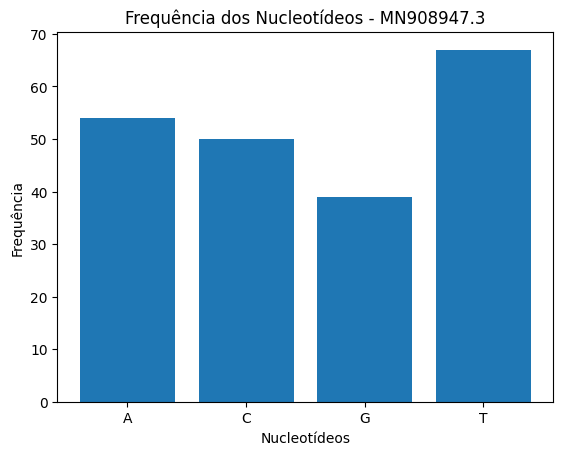

ID da sequência: MZ264787.1
Tamanho da sequência: 210 nucleotídeos



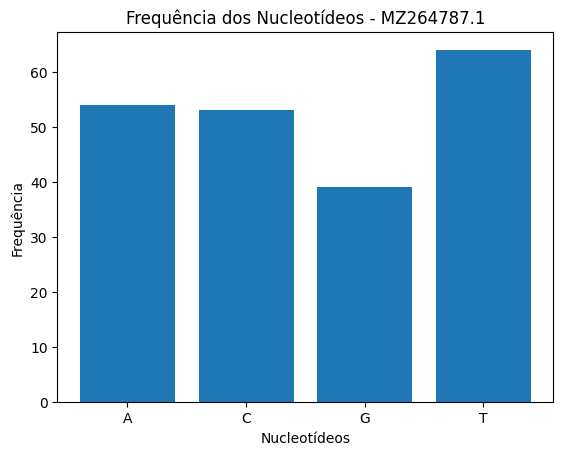

ID da sequência: NC_019843.3
Tamanho da sequência: 280 nucleotídeos



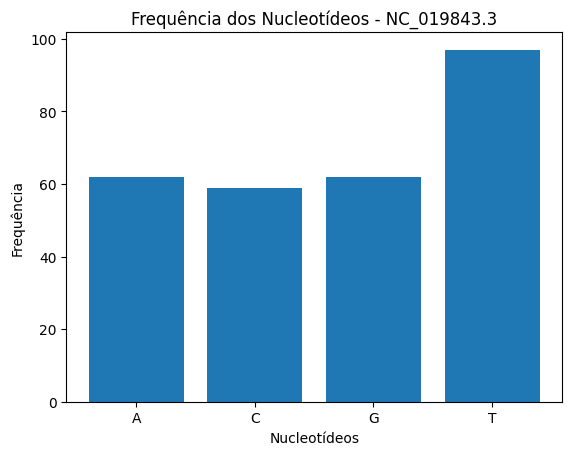

ID da sequência: MT324062.1
Tamanho da sequência: 280 nucleotídeos



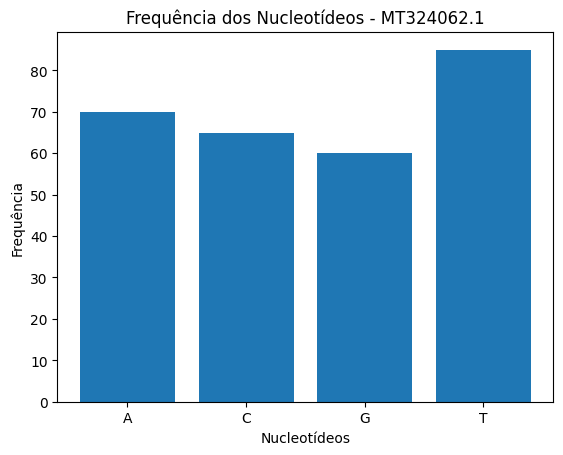

ID da sequência: MT012098.1
Tamanho da sequência: 280 nucleotídeos



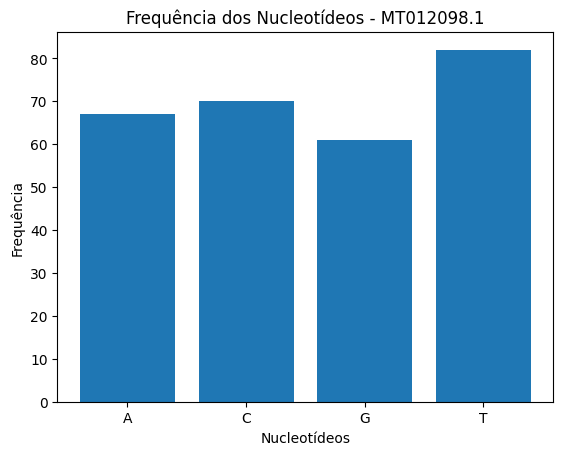

In [1]:
import ipywidgets as widgets
from IPython.display import display
from tkinter import Tk, filedialog
from Bio import SeqIO
from collections import Counter
import matplotlib.pyplot as plt

def ler_fasta():
    # Inicializa o Tkinter para abrir o explorador de arquivos
    root = Tk()
    root.withdraw()  # Esconde a janela principal do Tkinter
    root.call('wm', 'attributes', '.', '-topmost', True)  # Garante que fique no topo
    arquivo = filedialog.askopenfilename(
        title="Selecione um arquivo",
        filetypes=[("Arquivos de Texto", "*.txt")]
    )
    root.destroy()  # Fecha a janela root ao finalizar

    return arquivo

def contar_nucleotideos(sequencia):
    nucleotideos = ['A', 'C', 'G', 'T']  # 
    contagem = Counter(sequencia)
    
    frequencia = {nt: contagem[nt] for nt in sorted(nucleotideos)}
    
    return frequencia

def plotar_frequencias(frequencias, id_sequencia):
    plt.bar(frequencias.keys(), frequencias.values())
    plt.title(f"Frequência dos Nucleotídeos - {id_sequencia}")
    plt.xlabel("Nucleotídeos")
    plt.ylabel("Frequência")
    plt.show()

def processar_fasta(sequencias):
        
        for seq_record in sequencias:
            frequencia = contar_nucleotideos(seq_record.seq)
            tamanho = len(seq_record.seq)
            print(f"ID da sequência: {seq_record.id}")
            print(f"Tamanho da sequência: {tamanho} nucleotídeos\n")
            plotar_frequencias(frequencia, seq_record.id)


botao_selecionar = widgets.Button(description="Selecionar arquivo")
fasta = ler_fasta()

seq = list(SeqIO.parse(fasta, "fasta"))
processar_fasta(seq)



d - Descubra, qual função dentro do biopython, que fornece o conteúdo GC e
escreva um código para calcular a temperatura de meeting de cada uma das
sequencias. Discute qual é a importância da temperatura de melting para a
técnica de PCR ?

In [3]:
"""

A temperatura de melting (Tm) é crucial para o sucesso da técnica de PCR. Ela representa a temperatura na qual 50% das fitas duplas de DNA se separam. No PCR, a Tm é usada para determinar a temperatura de anelamento dos primers, que deve ser cerca de 3-5°C abaixo da Tm. Isso garante que os primers se liguem de forma específica e eficiente à sequência-alvo. Uma Tm inadequada pode resultar em amplificação inespecífica ou ineficiente. Além disso, a Tm é influenciada pelo conteúdo de GC, já que sequências ricas em G e C têm Tm mais elevadas devido às ligações mais fortes entre essas bases. Ajustar corretamente a Tm é essencial para garantir a especificidade e eficiência da amplificação no PCR.

"""

import ipywidgets as widgets
from IPython.display import display
from tkinter import Tk, filedialog
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction, MeltingTemp as mt

def ler_fasta():

    root = Tk()
    root.withdraw()  
    root.call('wm', 'attributes', '.', '-topmost', True)  
    arquivo = filedialog.askopenfilename(
        title="Selecione um arquivo",
        filetypes=[("Arquivos de Texto", "*.txt")]
    )
    root.destroy()  

    return arquivo

def processar_fasta(sequencias):
    for seq_record in sequencias:
       
        tamanho = len(seq_record.seq)
        
        gc_content = gc_fraction(seq_record.seq) * 100  
        
        tm = mt.Tm_NN(seq_record.seq)
        
        print(f"ID da sequência: {seq_record.id}")
        print(f"Tamanho da sequência: {tamanho} nucleotídeos")
        print(f"Conteúdo GC: {gc_content:.2f}%")
        print(f"Temperatura de melting (Tm): {tm:.2f}°C\n")

botao_selecionar = widgets.Button(description="Selecionar arquivo")
fasta = ler_fasta()

seq = list(SeqIO.parse(fasta, "fasta"))
processar_fasta(seq)



ID da sequência: MN908947.3
Tamanho da sequência: 210 nucleotídeos
Conteúdo GC: 42.38%
Temperatura de melting (Tm): 76.46°C

ID da sequência: MZ264787.1
Tamanho da sequência: 210 nucleotídeos
Conteúdo GC: 43.81%
Temperatura de melting (Tm): 77.02°C

ID da sequência: NC_019843.3
Tamanho da sequência: 280 nucleotídeos
Conteúdo GC: 43.21%
Temperatura de melting (Tm): 77.96°C

ID da sequência: MT324062.1
Tamanho da sequência: 280 nucleotídeos
Conteúdo GC: 44.64%
Temperatura de melting (Tm): 78.29°C

ID da sequência: MT012098.1
Tamanho da sequência: 280 nucleotídeos
Conteúdo GC: 46.79%
Temperatura de melting (Tm): 79.27°C



e - Faça o alinhamento global 2 a 2 dos primeiros 300 primeiros nucleotídeos
das sequencias. Imprime e anote o score máximo de cada alinhamento assim
como sua similaridade. Faça uma breve análise destes resultados.

In [6]:
import ipywidgets as widgets
from IPython.display import display
from tkinter import Tk, filedialog
from Bio import SeqIO
from Bio.Align import PairwiseAligner
from Bio.SeqUtils import gc_fraction, MeltingTemp as m

def ler_fasta():

    root = Tk()
    root.withdraw()  
    root.call('wm', 'attributes', '.', '-topmost', True)  
    arquivo = filedialog.askopenfilename(
        title="Selecione um arquivo",
        filetypes=[("Arquivos de Texto", "*.txt")]
    )
    root.destroy()  

    return arquivo

def ajustar_sequencia(seq):
    # Ajusta a sequência para que o comprimento seja um múltiplo de três
    while len(seq) % 3 != 0:
        seq += 'N'
    return seq

def processar_fasta(sequencias):
    seqs_limited = [ajustar_sequencia(str(seq_record.seq[:300])) for seq_record in sequencias]
    
    aligner = PairwiseAligner()
    n = len(seqs_limited)
    for i in range(n):
        for j in range(i+1, n):
            seq1 = seqs_limited[i]
            seq2 = seqs_limited[j]
            
            # Realiza o alinhamento global
            alignments = aligner.align(seq1, seq2)
            best_alignment = alignments[0]
            score = best_alignment.score
            similarity = (score / max(len(seq1), len(seq2))) * 100
            
            print(f"Alinhamento entre sequência {i+1} e sequência {j+1}:")
            print(f"Score máximo: {score:.2f}")
            print(f"Similaridade: {similarity:.2f}%")
            print()

botao_selecionar = widgets.Button(description="Selecionar arquivo")
fasta = ler_fasta()

seq = list(SeqIO.parse(fasta, "fasta"))
processar_fasta(seq)

Alinhamento entre sequência 1 e sequência 2:
Score máximo: 198.00
Similaridade: 94.29%

Alinhamento entre sequência 1 e sequência 3:
Score máximo: 162.00
Similaridade: 57.45%

Alinhamento entre sequência 1 e sequência 4:
Score máximo: 210.00
Similaridade: 74.47%

Alinhamento entre sequência 1 e sequência 5:
Score máximo: 197.00
Similaridade: 69.86%

Alinhamento entre sequência 2 e sequência 3:
Score máximo: 163.00
Similaridade: 57.80%

Alinhamento entre sequência 2 e sequência 4:
Score máximo: 206.00
Similaridade: 73.05%

Alinhamento entre sequência 2 e sequência 5:
Score máximo: 204.00
Similaridade: 72.34%

Alinhamento entre sequência 3 e sequência 4:
Score máximo: 193.00
Similaridade: 68.44%

Alinhamento entre sequência 3 e sequência 5:
Score máximo: 189.00
Similaridade: 67.02%

Alinhamento entre sequência 4 e sequência 5:
Score máximo: 268.00
Similaridade: 95.04%



f - Faça a síntese proteica (tradução) das sequencias e construa um gráfico de
barras com a frequências de aminoácidos. Há uma função no biopython que
faz esta etapa e coloca todos os aminoácidos em ordem alfabética.
Determina o número total de proteínas contidas em cada um das sequencias.

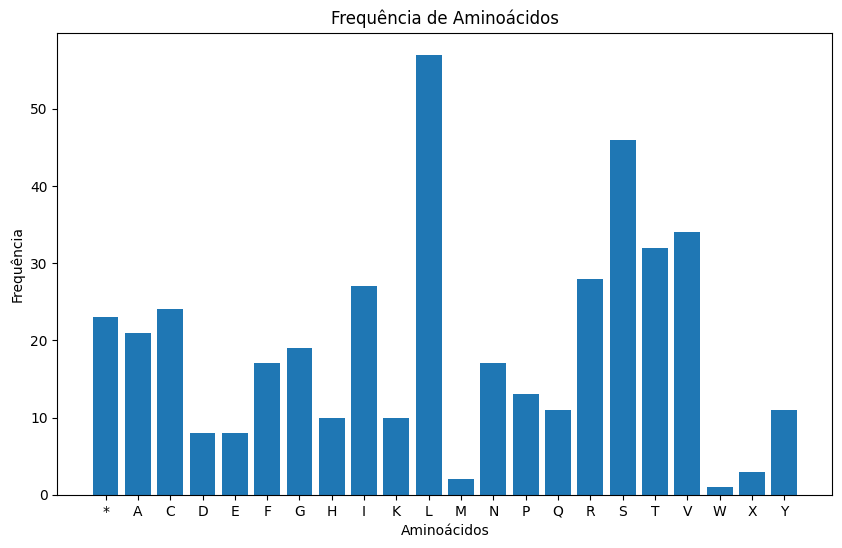

Número total de proteínas/fragments: 28


In [3]:
import ipywidgets as widgets
from IPython.display import display
from tkinter import Tk, filedialog
from Bio import SeqIO
from Bio.Seq import Seq
import matplotlib.pyplot as plt
from collections import Counter

def ajustar_sequencia(seq):
    while len(seq) % 3 != 0:
        seq += 'N'  # Adiciona 'N' para ajustar o comprimento
    return seq

# Função para processar as sequências, traduzir e calcular frequência de aminoácidos
def processar_fasta(sequencias):
    amino_acidos = []
    proteinas_totais = 0

    for seq_record in sequencias:
        # Limitar a 300 primeiros nucleotídeos para tradução
        seq = Seq(str(seq_record.seq[:300]))
        
        # Ajustar a sequência para ter comprimento múltiplo de três
        seq_ajustada = ajustar_sequencia(seq)
        
        # Tradução da sequência
        proteina = seq_ajustada.translate()
        amino_acidos.extend(proteina)
        
        # Contar o número total de proteínas (ou fragmentos)
        proteinas_totais += proteina.count('*') + 1  # Contar os fragmentos de proteínas

    # Contar a frequência de aminoácidos
    freq_amino_acidos = Counter(amino_acidos)
    
    # Ordenar aminoácidos alfabeticamente
    amino_acidos_ordenados = sorted(freq_amino_acidos.keys())
    
    # Criar o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(amino_acidos_ordenados, [freq_amino_acidos[aa] for aa in amino_acidos_ordenados])
    plt.xlabel('Aminoácidos')
    plt.ylabel('Frequência')
    plt.title('Frequência de Aminoácidos')
    plt.show()
    
    print(f"Número total de proteínas/fragments: {proteinas_totais}")

botao_selecionar = widgets.Button(description="Selecionar arquivo")
fasta = ler_fasta()

seq = list(SeqIO.parse(fasta, "fasta"))
processar_fasta(seq)

g - Determine a estrutura secundaria das proteínas das sequencias. Para esta
pergunta utilize a função proteinanalysis. Discuta os resultados obtidos.

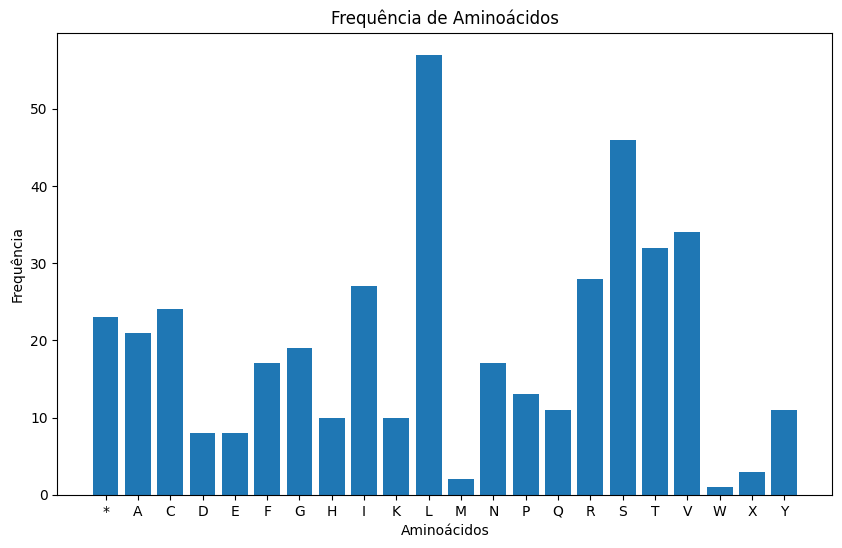

Estrutura secundária da proteína 1:
Helix: 0.19
Sheet: 0.21
Turn: 0.43

Estrutura secundária da proteína 2:
Helix: 0.29
Sheet: 0.24
Turn: 0.41

Estrutura secundária da proteína 3:
Helix: 0.28
Sheet: 0.21
Turn: 0.50

Estrutura secundária da proteína 4:
Helix: 0.17
Sheet: 0.24
Turn: 0.39

Estrutura secundária da proteína 5:
Helix: 0.24
Sheet: 0.30
Turn: 0.38

Número total de proteínas/fragments: 28


In [2]:
import ipywidgets as widgets
from IPython.display import display
from tkinter import Tk, filedialog
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqUtils import ProtParam
import matplotlib.pyplot as plt
from collections import Counter

def ler_fasta():

    root = Tk()
    root.withdraw()  
    root.call('wm', 'attributes', '.', '-topmost', True)  
    arquivo = filedialog.askopenfilename(
        title="Selecione um arquivo",
        filetypes=[("Arquivos de Texto", "*.txt")]
    )
    root.destroy()  

    return arquivo

def ajustar_sequencia(seq):
    while len(seq) % 3 != 0:
        seq += 'N'  
        
    return seq

def processar_fasta(sequencias):
    amino_acidos = []
    proteinas_totais = 0
    
    estruturas_secundarias = []

    for seq_record in sequencias:

        seq = Seq(str(seq_record.seq[:300]))
        

        seq_ajustada = ajustar_sequencia(seq)
        

        proteina = seq_ajustada.translate()
        amino_acidos.extend(proteina)
        

        analise_proteina = ProtParam.ProteinAnalysis(str(proteina))
        

        estrutura_secundaria = analise_proteina.secondary_structure_fraction()
        estruturas_secundarias.append(estrutura_secundaria)
        

        proteinas_totais += proteina.count('*') + 1  # Contar os fragmentos de proteínas


    freq_amino_acidos = Counter(amino_acidos)
    

    amino_acidos_ordenados = sorted(freq_amino_acidos.keys())
    

    plt.figure(figsize=(10, 6))
    plt.bar(amino_acidos_ordenados, [freq_amino_acidos[aa] for aa in amino_acidos_ordenados])
    plt.xlabel('Aminoácidos')
    plt.ylabel('Frequência')
    plt.title('Frequência de Aminoácidos')
    plt.show()
    
    tipos_estruturas = ['Helix', 'Sheet', 'Turn']
    for i, estrutura in enumerate(estruturas_secundarias):
        print(f"Estrutura secundária da proteína {i+1}:")
        for tipo, fração in zip(tipos_estruturas, estrutura):
            print(f"{tipo}: {fração:.2f}")
        print()

    print(f"Número total de proteínas/fragments: {proteinas_totais}")


botao_selecionar = widgets.Button(description="Selecionar arquivo")
fasta = ler_fasta()

seq = list(SeqIO.parse(fasta, "fasta"))
processar_fasta(seq)